In [ ]:
!pip install numpy==1.23.5 --force-reinstall
!pip install pandas matplotlib fitter kagglehub --upgrade --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
  Using cached fitter-1.7.1-py3-none-any.whl.metadata (8.2 kB)
^C


In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from fitter import Fitter

# Download latest version
path = kagglehub.dataset_download("sudalairajkumar/daily-temperature-of-major-cities")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sudalairajkumar/daily-temperature-of-major-cities/versions/1


<ipython-input-10-35e6077aa902>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


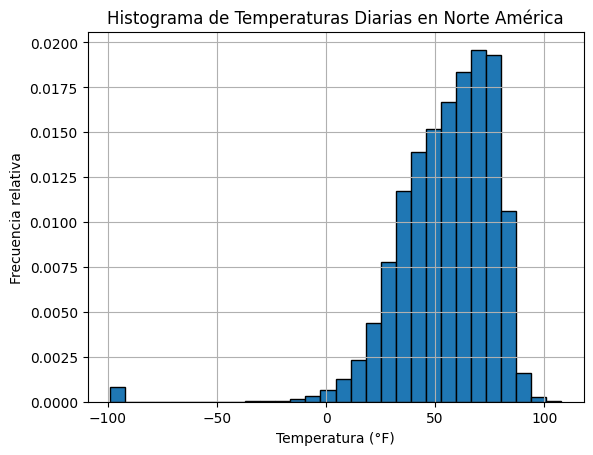

In [ ]:
data_path = f"{path}/city_temperature.csv"
df = pd.read_csv(data_path)

north_america_temps = df[df['Region'] == 'North America']['AvgTemperature'].dropna()

plt.hist(north_america_temps, bins=30, edgecolor='black', density=True)
plt.title('Histograma de Temperaturas Diarias en Norte América')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Frecuencia relativa')
plt.grid(True)
plt.show()

2025-04-08 03:48:04.937 | WARNING  | fitter.fitter:plot_pdf:419 - beta was not fitted. no parameters available
2025-04-08 03:48:04.941 | WARNING  | fitter.fitter:plot_pdf:419 - gamma was not fitted. no parameters available
2025-04-08 03:48:04.942 | WARNING  | fitter.fitter:plot_pdf:419 - lognorm was not fitted. no parameters available


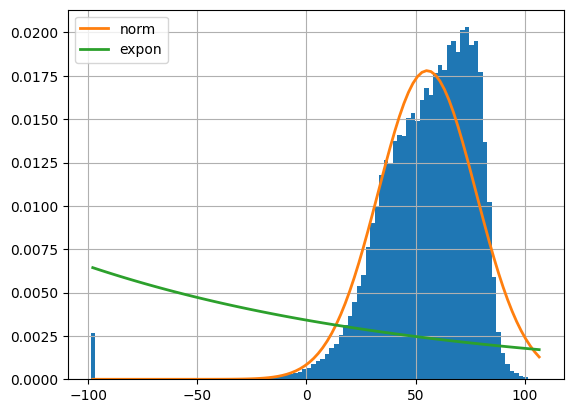

In [ ]:
f = Fitter(north_america_temps, distributions=['norm', 'lognorm', 'expon', 'gamma', 'beta'])
f.fit()
f.summary()
plt.show()

In [ ]:
best_dist = f.get_best()
print("Mejor distribución y parámetros:", best_dist)

Mejor distribución y parámetros: {'norm': {'loc': 55.30093262524563, 'scale': 22.411270842390223}}
